In [36]:
# Importing requests, BeautifulSoup, nltk, and Counter
import requests# to fetch the html file
from bs4 import BeautifulSoup#to extract words from the html file 
import nltk
from collections import Counter #to analyze the frequency

In [37]:

# Getting the Moby Dick HTML 
r = requests.get('https://www.gutenberg.org/files/1450/1450-h/1450-h.htm')

# Setting the correct text encoding of the HTML page
r.encoding = 'utf-8'

# Extracting the HTML from the request object
html = r.text

# Printing the first 2000 characters in html
print(html[:2000])

<?xml version="1.0" encoding="utf-8"?>

<!DOCTYPE html
   PUBLIC "-//W3C//DTD XHTML 1.0 Strict//EN"
   "http://www.w3.org/TR/xhtml1/DTD/xhtml1-strict.dtd" >

<html xmlns="http://www.w3.org/1999/xhtml" lang="en">
  <head>
    <title>
      Pollyanna, by Eleanor H. Porter
    </title>
    <style type="text/css" xml:space="preserve">

    body { margin:5%; background:#faebd0; text-align:justify}
    P { text-indent: 1em; margin-top: .25em; margin-bottom: .25em; }
    H1,H2,H3,H4,H5,H6 { text-align: center; margin-left: 15%; margin-right: 15%; }
    hr  { width: 50%; text-align: center;}
    .foot { margin-left: 20%; margin-right: 20%; text-align: justify; text-indent: -3em; font-size: 90%; }
    blockquote {font-size: 97%; font-style: italic; margin-left: 10%; margin-right: 10%;}
    .mynote    {background-color: #DDE; color: #000; padding: .5em; margin-left: 10%; margin-right: 10%; font-family: sans-serif; font-size: 95%;}
    .toc       { margin-left: 10%; margin-bottom: .75em;}
    .to

In [38]:
# Creating a BeautifulSoup object from the HTML
soup = BeautifulSoup(html)

# Getting the text out of the soup
text = soup.text

# Printing out text between characters 32000 and 34000
print(text[32000:34000])

w we didn't have any of those nice
      things, 'cause I shall like Aunt Polly's all the better—not being
      used to 'em, you see. Just as it is when the PRETTY hair-ribbons come in
      the barrels after a lot of faded-out brown ones. My! but isn't this a
      perfectly beautiful house?” she broke off fervently, as they turned into
      the wide driveway.
    

      It was when Timothy was unloading the trunk that Nancy found an
      opportunity to mutter low in his ear:
    

      “Don't you never say nothin' ter me again about leavin', Timothy Durgin.
      You couldn't HIRE me ter leave!”
     

      “Leave! I should say not,” grinned the youth.
    

      “You couldn't drag me away. It'll be more fun here now, with that kid
      'round, than movin'-picture shows, every day!”
     

      “Fun!—fun!” repeated Nancy, indignantly, “I guess it'll be somethin'
      more than fun for that blessed child—when them two tries ter live
      tergether; and I guess she'll be a-n

In [39]:
# Creating a tokenizer
tokenizer = nltk.tokenize.RegexpTokenizer('\w+')

# Tokenizing the text
tokens = tokenizer.tokenize(text)

# Printing out the first 8 words / tokens 
print(tokens[:8])

['Pollyanna', 'by', 'Eleanor', 'H', 'Porter', 'body', 'margin', '5']


In [40]:
# Create a list called words containing all tokens transformed to lower-case
words = [token.lower() for token in tokens]

# Printing out the first 8 words / tokens 
print(words[:8])

['pollyanna', 'by', 'eleanor', 'h', 'porter', 'body', 'margin', '5']


In [41]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [42]:
# Getting the English stop words from nltk
sw = nltk.corpus.stopwords.words('english')
# Printing out the first eight stop words
print(sw[:8])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves']


In [43]:
# Create a list words_ns containing all words that are in words but not in sw
words_ns = [w for w in words if w not in sw]

# Printing the first 5 words_ns to check that stop words are gone
words_ns[:5]

['pollyanna', 'eleanor', 'h', 'porter', 'body']

In [44]:
# Initialize a Counter object from our processed list of words
count = Counter(words_ns)
import itertools
# Store 10 most common words and their counts as top_ten
top_ten = count.most_common(10)
# Print the top ten words and their counts
print(top_ten)

[('pollyanna', 844), ('polly', 470), ('little', 335), ('know', 331), ('miss', 323), ('nancy', 306), ('aunt', 299), ('glad', 285), ('one', 213), ('see', 209)]


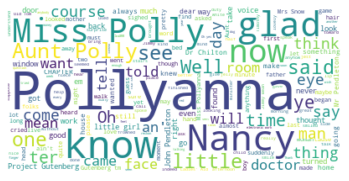

In [45]:
#generating wordclouds
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
cloud_pollyanna = WordCloud(background_color="white", stopwords = STOPWORDS, random_state=8).generate(text)
plt.imshow(cloud_pollyanna, interpolation='bilinear')
plt.axis("off")
plt.show()

Therefore, the most common words in the novel are Pollyanna, Nancy, Miss Polly and **glad** :)

In [46]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [47]:
import nltk
nltk.download('maxent_ne_chunker')
import nltk
nltk.download('words')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [48]:
text[3700:5010]

"\n\r\n      Miss Polly Harrington entered her kitchen a little hurriedly this June\r\n      morning. Miss Polly did not usually make hurried movements; she specially\r\n      prided herself on her repose of manner. But to-day she was hurrying—actually\r\n      hurrying.\r\n    \n\r\n      Nancy, washing dishes at the sink, looked up in surprise. Nancy had been\r\n      working in Miss Polly's kitchen only two months, but already she knew that\r\n      her mistress did not usually hurry.\r\n    \n\r\n      “Nancy!”\r\n     \n\r\n      “Yes, ma'am.” Nancy answered cheerfully, but she still continued wiping\r\n      the pitcher in her hand.\r\n    \n\r\n      “Nancy,”—Miss Polly's voice was very stern now—“when I'm\r\n      talking to you, I wish you to stop your work and listen to what I have to\r\n      say.”\r\n     \n\r\n      Nancy flushed miserably. She set the pitcher down at once, with the cloth\r\n      still about it, thereby nearly tipping it over—which did not add to\r\n     

In [51]:
#parts of speech tagging using nltk's pos_tag
tagged = nltk.pos_tag(words_ns[:-5000])
# print([word for word,tag in tagged if tag=='NN'])
print(nltk.ne_chunk(tagged))

(S
  pollyanna/NN
  eleanor/NN
  h/NN
  porter/NN
  body/NN
  margin/NN
  5/CD
  background/NN
  faebd0/NN
  text/NN
  align/NN
  justify/NN
  p/NN
  text/NN
  indent/NN
  1em/CD
  margin/NN
  top/JJ
  25em/CD
  margin/NN
  bottom/NN
  25em/CD
  h1/NN
  h2/NN
  h3/NN
  h4/NN
  h5/NN
  h6/NN
  text/JJ
  align/NN
  center/NN
  margin/NN
  left/VBD
  15/CD
  margin/NN
  right/RB
  15/CD
  hr/NNS
  width/JJ
  50/CD
  text/JJ
  align/NN
  center/JJ
  foot/NN
  margin/NN
  left/VBD
  20/CD
  margin/NN
  right/RB
  20/CD
  text/JJ
  align/NN
  justify/NN
  text/JJ
  indent/NN
  3em/CD
  font/NN
  size/NN
  90/CD
  blockquote/NN
  font/NN
  size/NN
  97/CD
  font/JJ
  style/NN
  italic/JJ
  margin/NN
  left/VBD
  10/CD
  margin/NN
  right/RB
  10/CD
  mynote/NN
  background/NN
  color/NN
  dde/NN
  color/NN
  000/CD
  padding/VBG
  5em/CD
  margin/NN
  left/VBD
  10/CD
  margin/NN
  right/RB
  10/CD
  font/JJ
  family/NN
  sans/NNS
  serif/VBP
  font/JJ
  size/NN
  95/CD
  toc/NN
  margin/NN
 

In [52]:
!pip install transformers

In [53]:
print(len(text))

384707


In [54]:
pip install transformers[sentencepiece]

Summarization using transformers from the Hugging face library

In [55]:
print(text[31000:34000])

 where there was no carpet.
    

      “Oh, I'm so glad,” exulted Pollyanna. “I love carpets. We didn't have any,
      only two little rugs that came in a missionary barrel, and one of those
      had ink spots on it. Mrs. White had pictures, too, perfectly beautiful
      ones of roses and little girls kneeling and a kitty and some lambs and a
      lion—not together, you know—the lambs and the lion. Oh, of
      course the Bible says they will sometime, but they haven't yet—that
      is, I mean Mrs. White's haven't. Don't you just love pictures?”
     

      “I—I don't know,” answered Nancy in a half-stifled voice.
    

      “I do. We didn't have any pictures. They don't come in the barrels much,
      you know. There did two come once, though. But one was so good father sold
      it to get money to buy me some shoes with; and the other was so bad it
      fell to pieces just as soon as we hung it up. Glass—it broke, you
      know. And I cried. But I'm glad now we didn't have

In [56]:
from transformers import pipeline
summarizer = pipeline("summarization", model='google/pegasus-large')
summarizer(text[31000:34000])


[{'summary_text': "White had pictures, too, perfectly beautiful ones of roses and little girls kneeling and a kitty and some lambs and a lion—not together, you know—the lambs and the lion. But I'm glad now we didn't have any of those nice things, 'cause I shall like Aunt Polly's all the better—not being used to 'em, you see. It was when Timothy was unloading the trunk that Nancy found an opportunity to mutter low in his ear: “Don't you never say nothin' ter me again about leavin', Timothy Durgin. It'll be more fun here now, with that kid 'round, than movin'-picture shows, every day!” “Fun!—fun!” repeated Nancy, indignantly, “I guess it'll be somethin' more than fun for that blessed child—when them two tries ter live tergether; and I guess she'll be a-needin' some rock ter fly to for refuge."}]

In [57]:
from textblob import TextBlob
TextBlob(text[31000:34000]).sentiment

Sentiment(polarity=0.2009027557808046, subjectivity=0.5766114982578396)

In [58]:
classifier = pipeline("sentiment-analysis", model='distilbert-base-uncased')
classifier(text[31000:32000])

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_transform.bias', 'vocab_projector.bias', 'vocab_layer_norm.bias', 'vocab_transform.weight', 'vocab_projector.weight', 'vocab_layer_norm.weight']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.weight', 'pre_classifier.weight', 'pre_clas

[{'label': 'LABEL_0', 'score': 0.5019785761833191}]

This extract of the novel is therefore positive